## Grid Search Sensitivity Analysis

Based on an exhausive monte carlo and parameter sweep run previously performed ([run log](https://github.com/BlockScience/reflexer/blob/experiment-analysis/experiments/system_model_v3/experiment_monte_carlo/experiment_run_log.md) and the [experiment code](https://github.com/BlockScience/reflexer/blob/experiment-analysis/experiments/system_model_v3/experiment_monte_carlo.py)), postprocessed in the [KPI Notebook](https://github.com/BlockScience/reflexer/blob/experiment-analysis/notebooks/analysis/experiment_notebooks/KPI%20Analysis.ipynb), we will analyze the results and perform sensitivity analysis to illustrate how to examine complex simulation results. 


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk

%matplotlib inline

# Simulation Analysis

In [4]:
# load data
df_sensitivity = pd.read_pickle('saved_results/df_sensitivity.pickle')
df_sensitivity.head()

,index,timedelta,cumulative_time,timestamp,eth_price,liquidity_demand,liquidity_demand_mean,eth_collateral,eth_locked,eth_freed,...,control_period,liquidity_demand_shock,arbitrageur_considers_liquidation_ratio,rescale_target_price,target_price_scaled,kpi_stability,kpi_volatility,kpi_liquidity,volatility_ratio_simulation,volatility_ratio_window
0,0,0,0,2017-01-01 00:00:00,294.069151,1.000000,1.000000,154827.528922,154827.528922,0.000000,...,3600.0,True,True,True,4.553,False,True,False,0.068042,0.000199
1,1,3600,3600,2017-01-01 01:00:00,291.208252,906.674484,453.837242,154827.528922,154827.528922,0.000000,...,3600.0,True,True,True,3.140,False,True,False,0.068042,0.000199
2,2,3600,7200,2017-01-01 02:00:00,292.287792,-326.024615,63.906314,107503.536596,154827.528922,47323.992326,...,3600.0,True,True,True,3.140,False,True,False,0.068042,0.000199
3,3,3600,10800,2017-01-01 03:00:00,289.343698,209.658450,136.782382,107503.536596,154827.528922,47323.992326,...,3600.0,True,True,True,3.140,False,True,False,0.068042,0.000199
4,4,3600,14400,2017-01-01 04:00:00,286.827771,-79.844839,28.468771,107503.536596,154827.528922,47323.992326,...,3600.0,True,True,True,3.140,False,True,False,0.068042,0.000199


In [5]:
df_sensitivity.columns

Index(['index', 'timedelta', 'cumulative_time', 'timestamp', 'eth_price',
       'liquidity_demand', 'liquidity_demand_mean', 'eth_collateral',
       'eth_locked', 'eth_freed', 'principal_debt', 'rai_drawn', 'rai_wiped',
       'system_revenue', 'stability_fee', 'market_price', 'market_price_twap',
       'target_price', 'target_rate', 'eth_return', 'eth_gross_return',
       'expected_market_price', 'expected_debt_price', 'error_star',
       'error_star_integral', 'market_slippage', 'RAI_balance', 'ETH_balance',
       'UNI_supply', 'simulation', 'subset', 'run', 'substep', 'timestep',
       'eth_collateral_value', 'collateralization_ratio', 'ki', 'kp',
       'liquidation_ratio', 'controller_enabled', 'control_period',
       'liquidity_demand_shock', 'arbitrageur_considers_liquidation_ratio',
       'rescale_target_price', 'target_price_scaled', 'kpi_stability',
       'kpi_volatility', 'kpi_liquidity', 'volatility_ratio_simulation',
       'volatility_ratio_window'],
      dtype

In [6]:
# install cadCAD Machine Search
!pip install cadcad_machine_search

### Sensitivity Analysis via Machine Search

# TODO Describe Machine Search

In [58]:
from cadcad_machine_search.visualizations import kpi_sensitivity_plot

# Plots the sensitivity of a result dataset towards a KPI.

# Set control parameters for sensitivity analysis
control_params = [
    'ki',
    'kp',
    'control_period',
]

goals = {
    'low_volatility'  : lambda metrics: metrics['kpi_volatility'].mean(),
    'high_stability'  : lambda metrics: metrics['kpi_stability'].mean(),
    'liquidity_threshold': lambda metrics: metrics['kpi_liquidity'].mean(),
}



#### Controller enabled KPI Sensitivity 

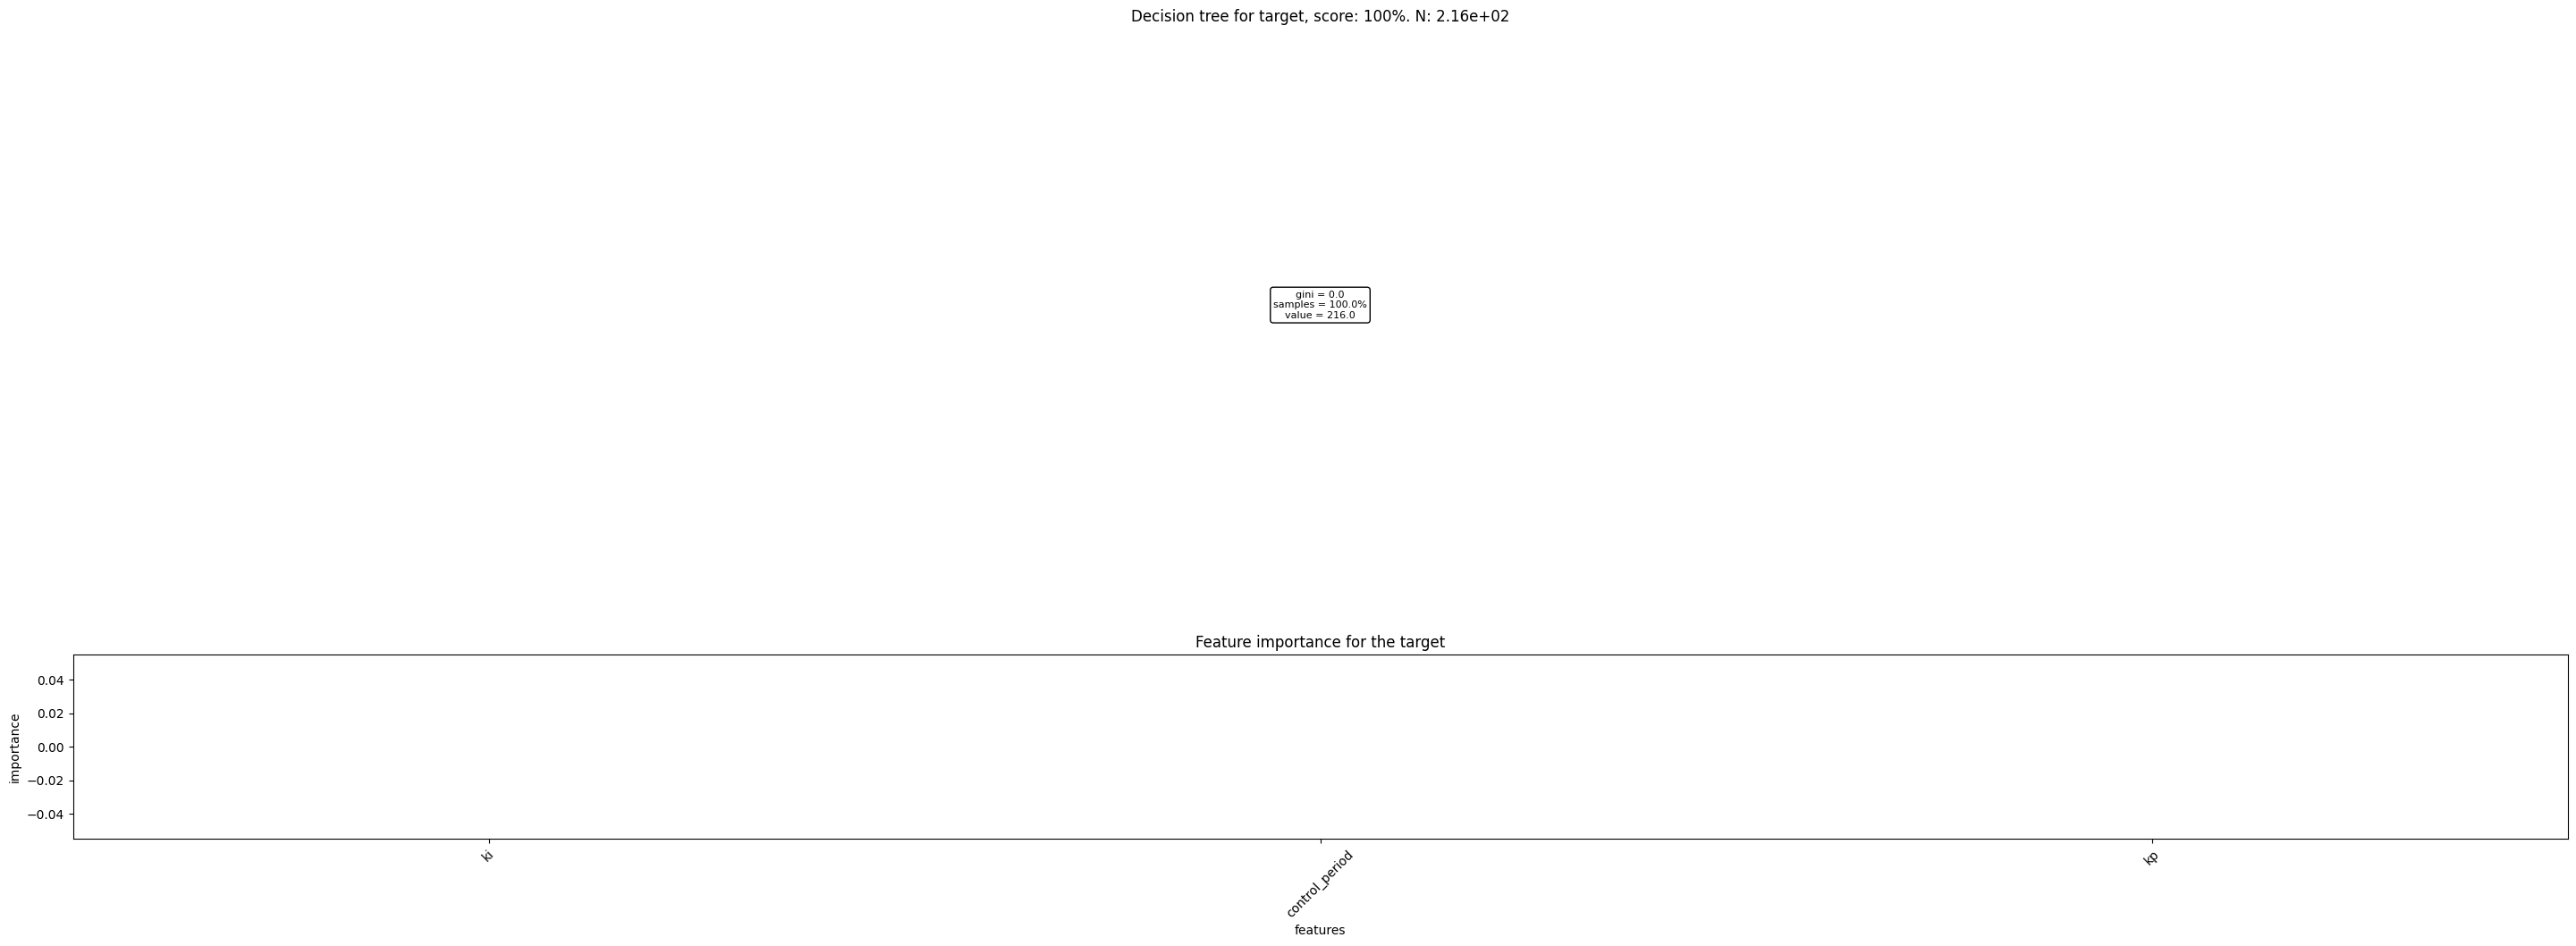

In [42]:
enabled = df_sensitivity.query(f'controller_enabled == True')
kpi_sensitivity_plot(enabled, goals['low_volatility'], control_params)


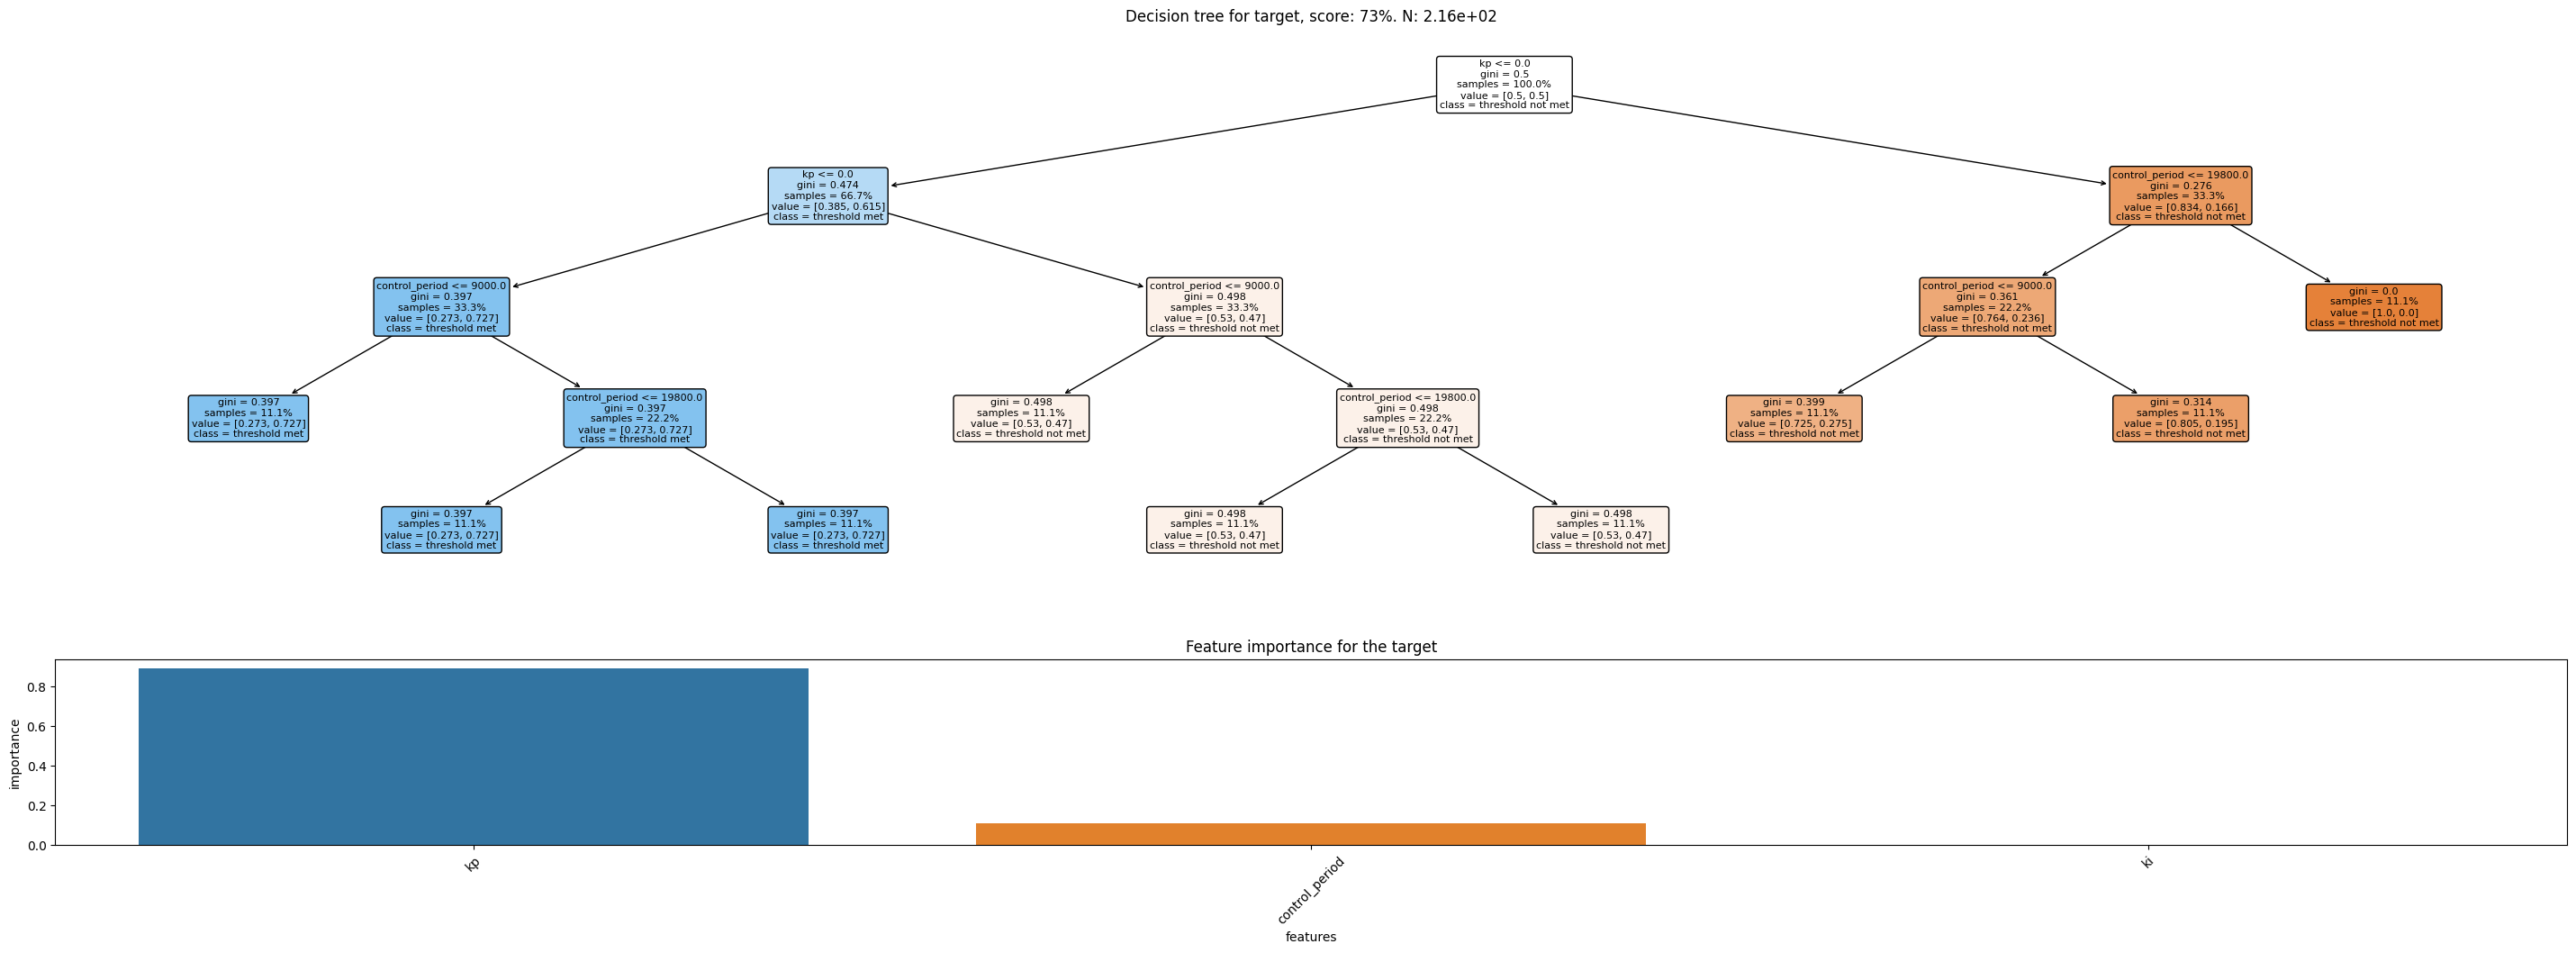

In [44]:
kpi_sensitivity_plot(enabled, goals['high_stability'], control_params)

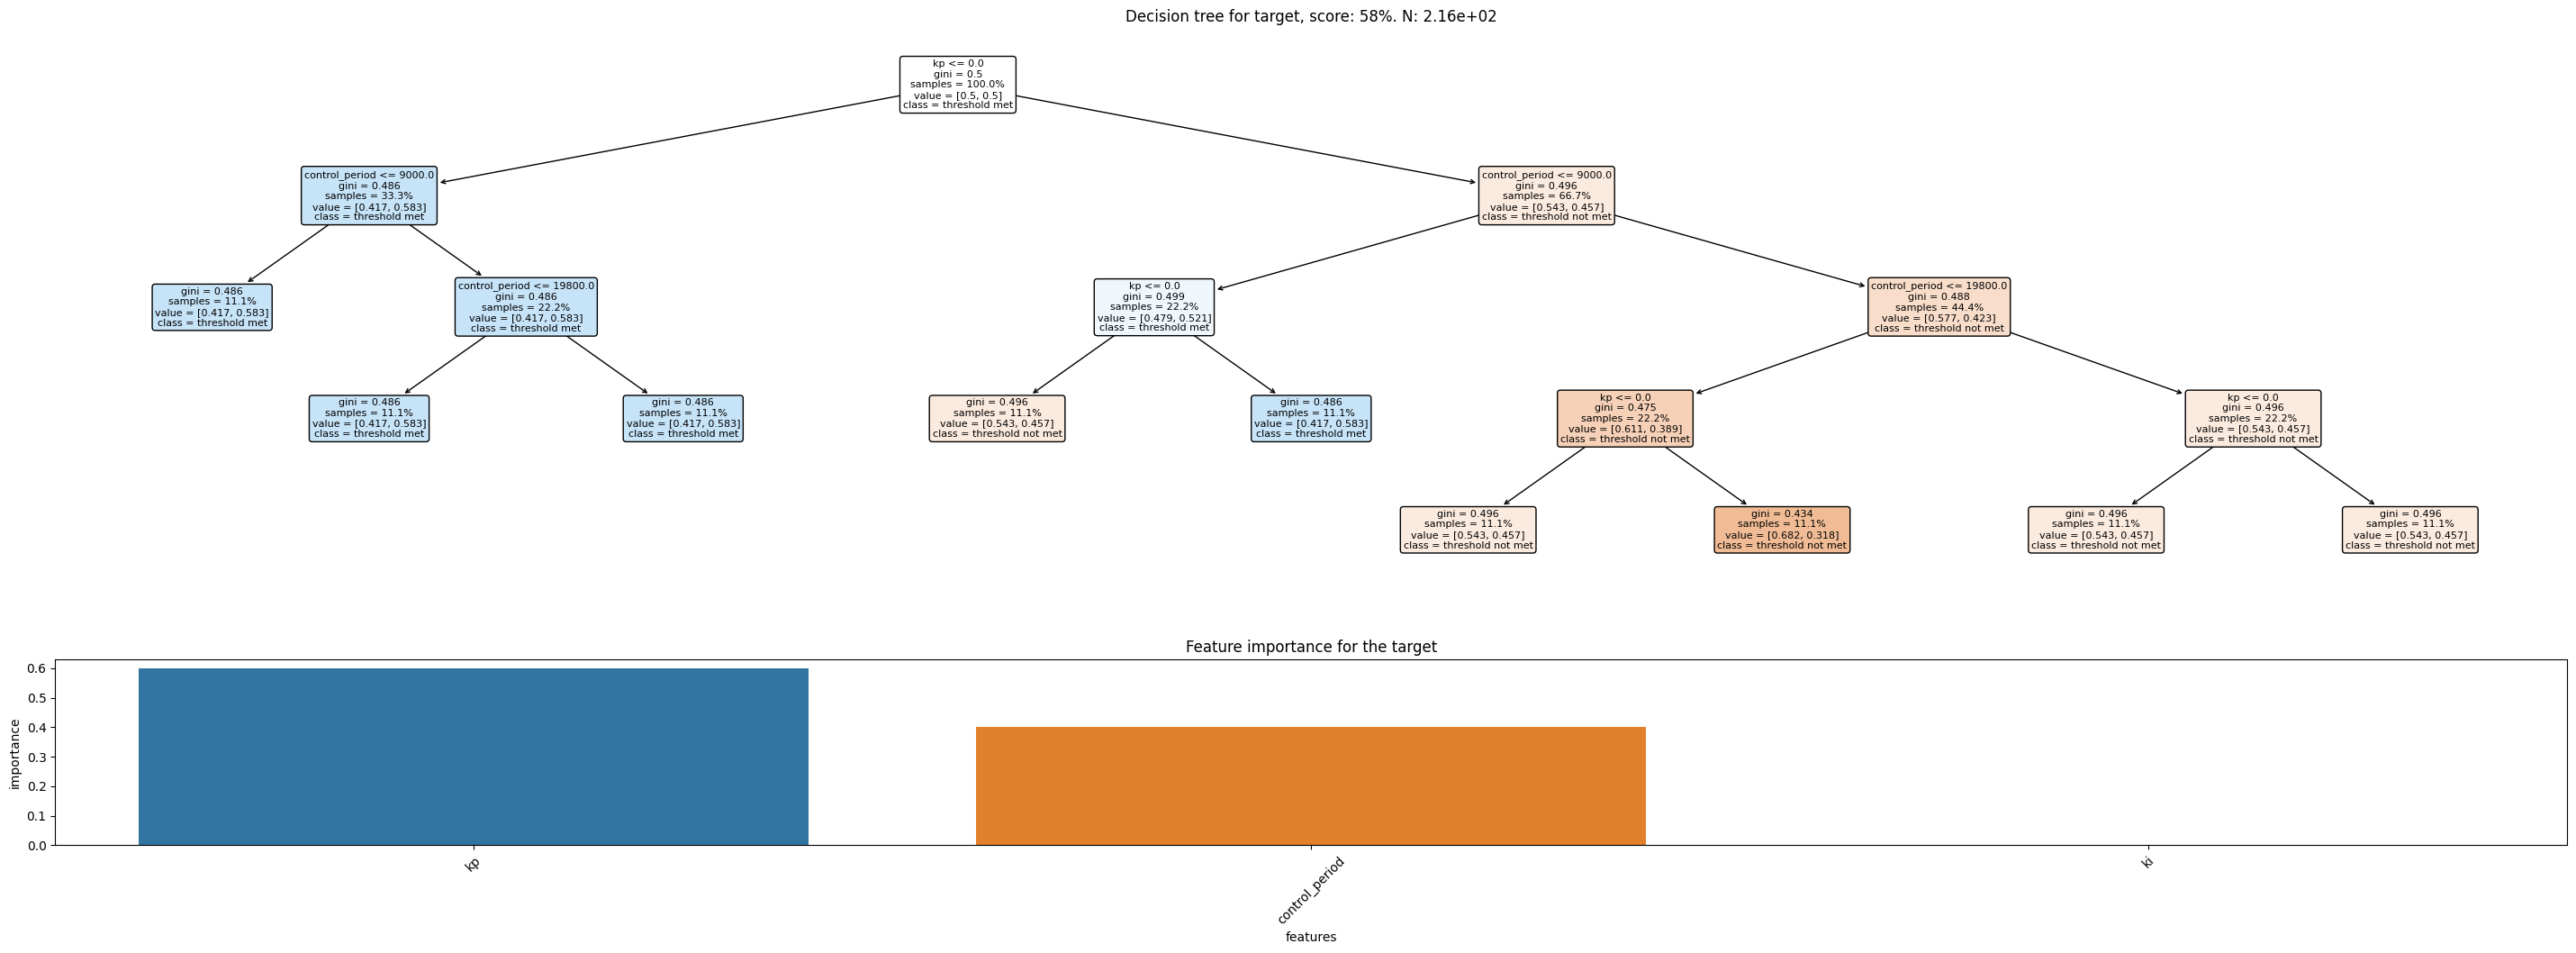

In [45]:
kpi_sensitivity_plot(enabled, goals['liquidity_threshold'], control_params)

#### Liquidity Demand Shock KPI Sensitivity  True

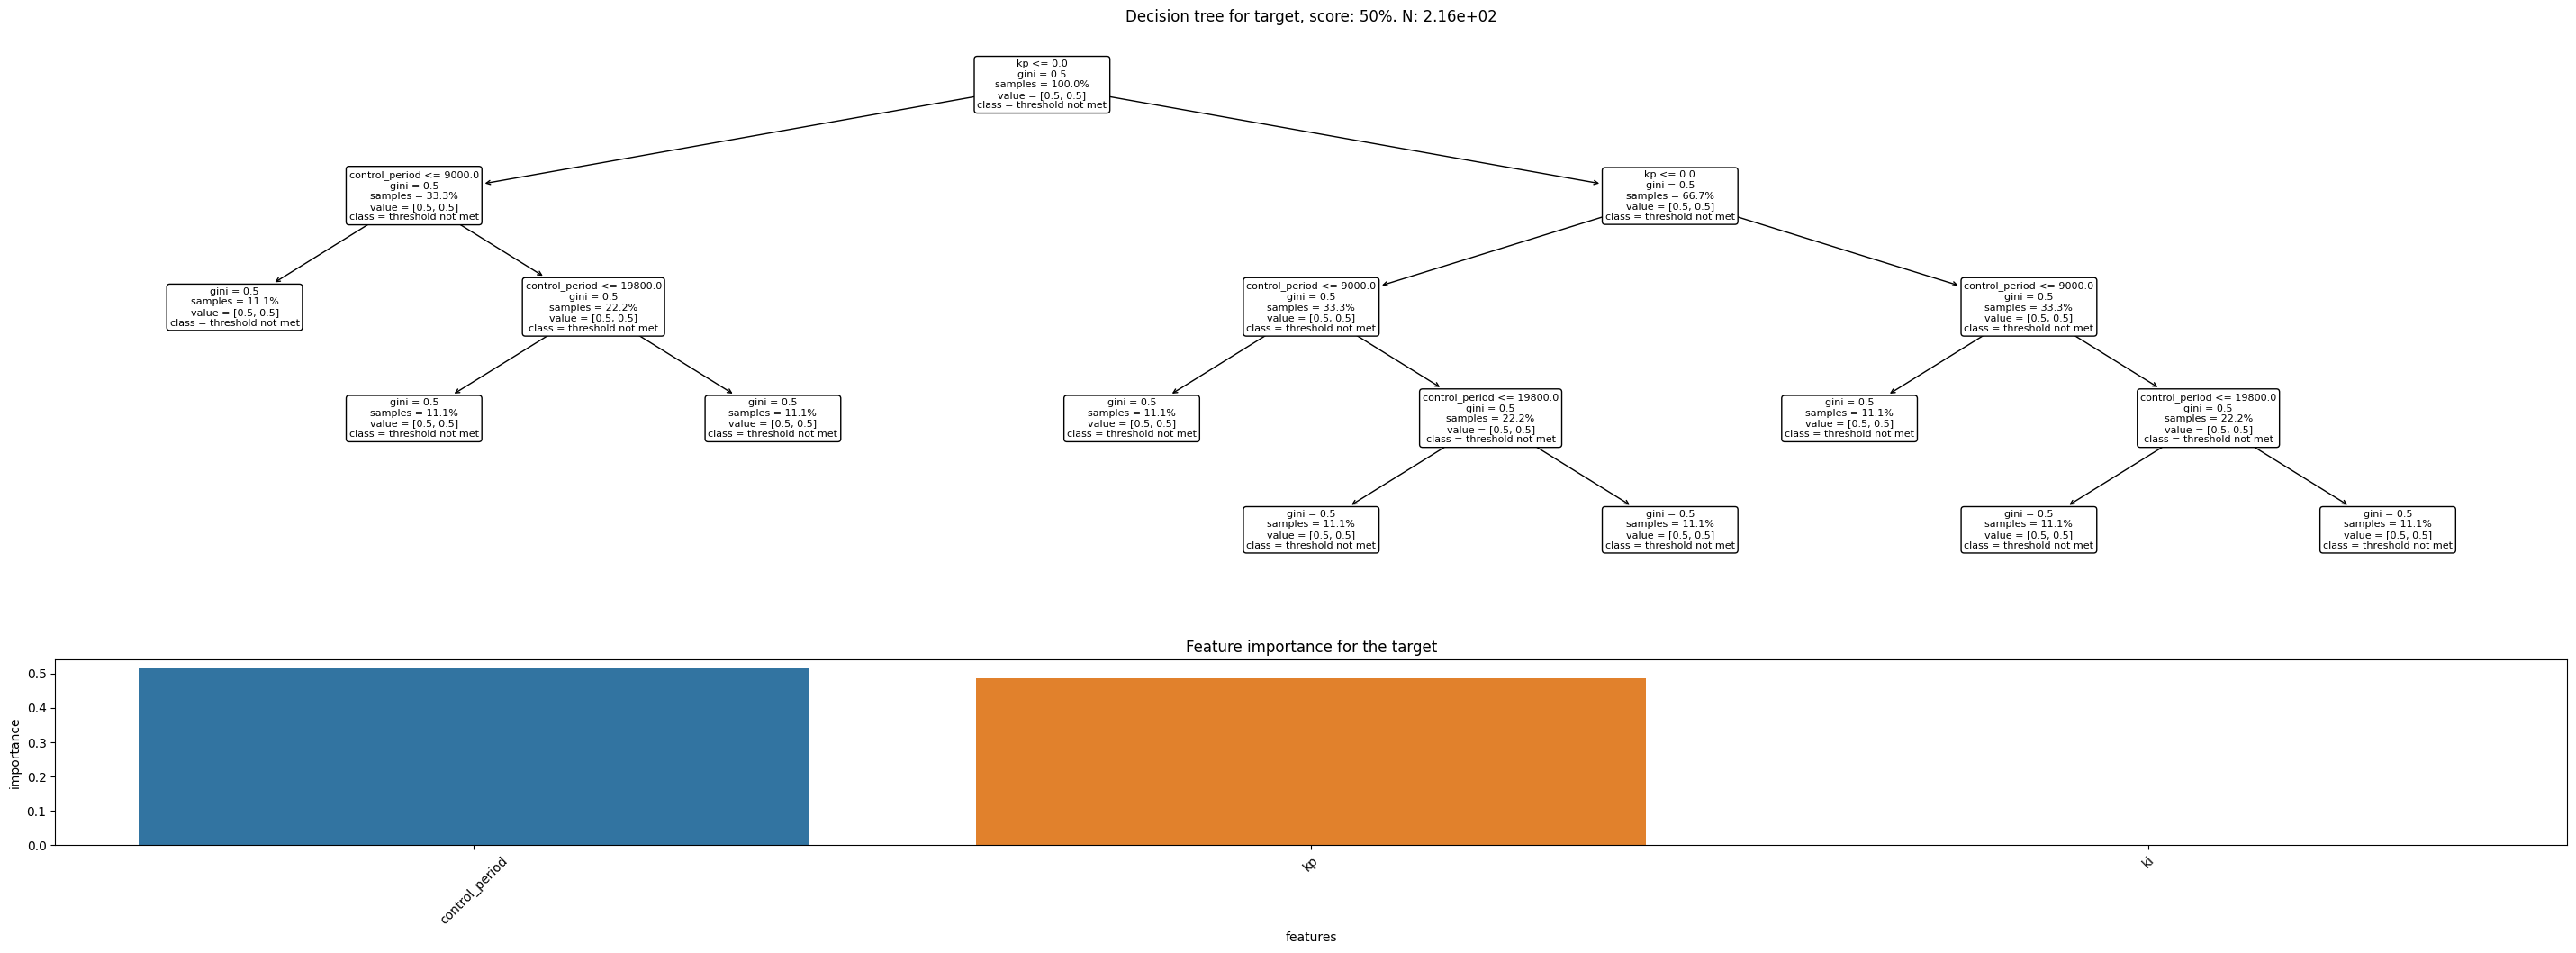

In [48]:
liquidity_demand_shock_true = df_sensitivity.query('liquidity_demand_shock == True')
liquidity_demand_shock_false = df_sensitivity.query('liquidity_demand_shock == False')
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['low_volatility'], control_params)


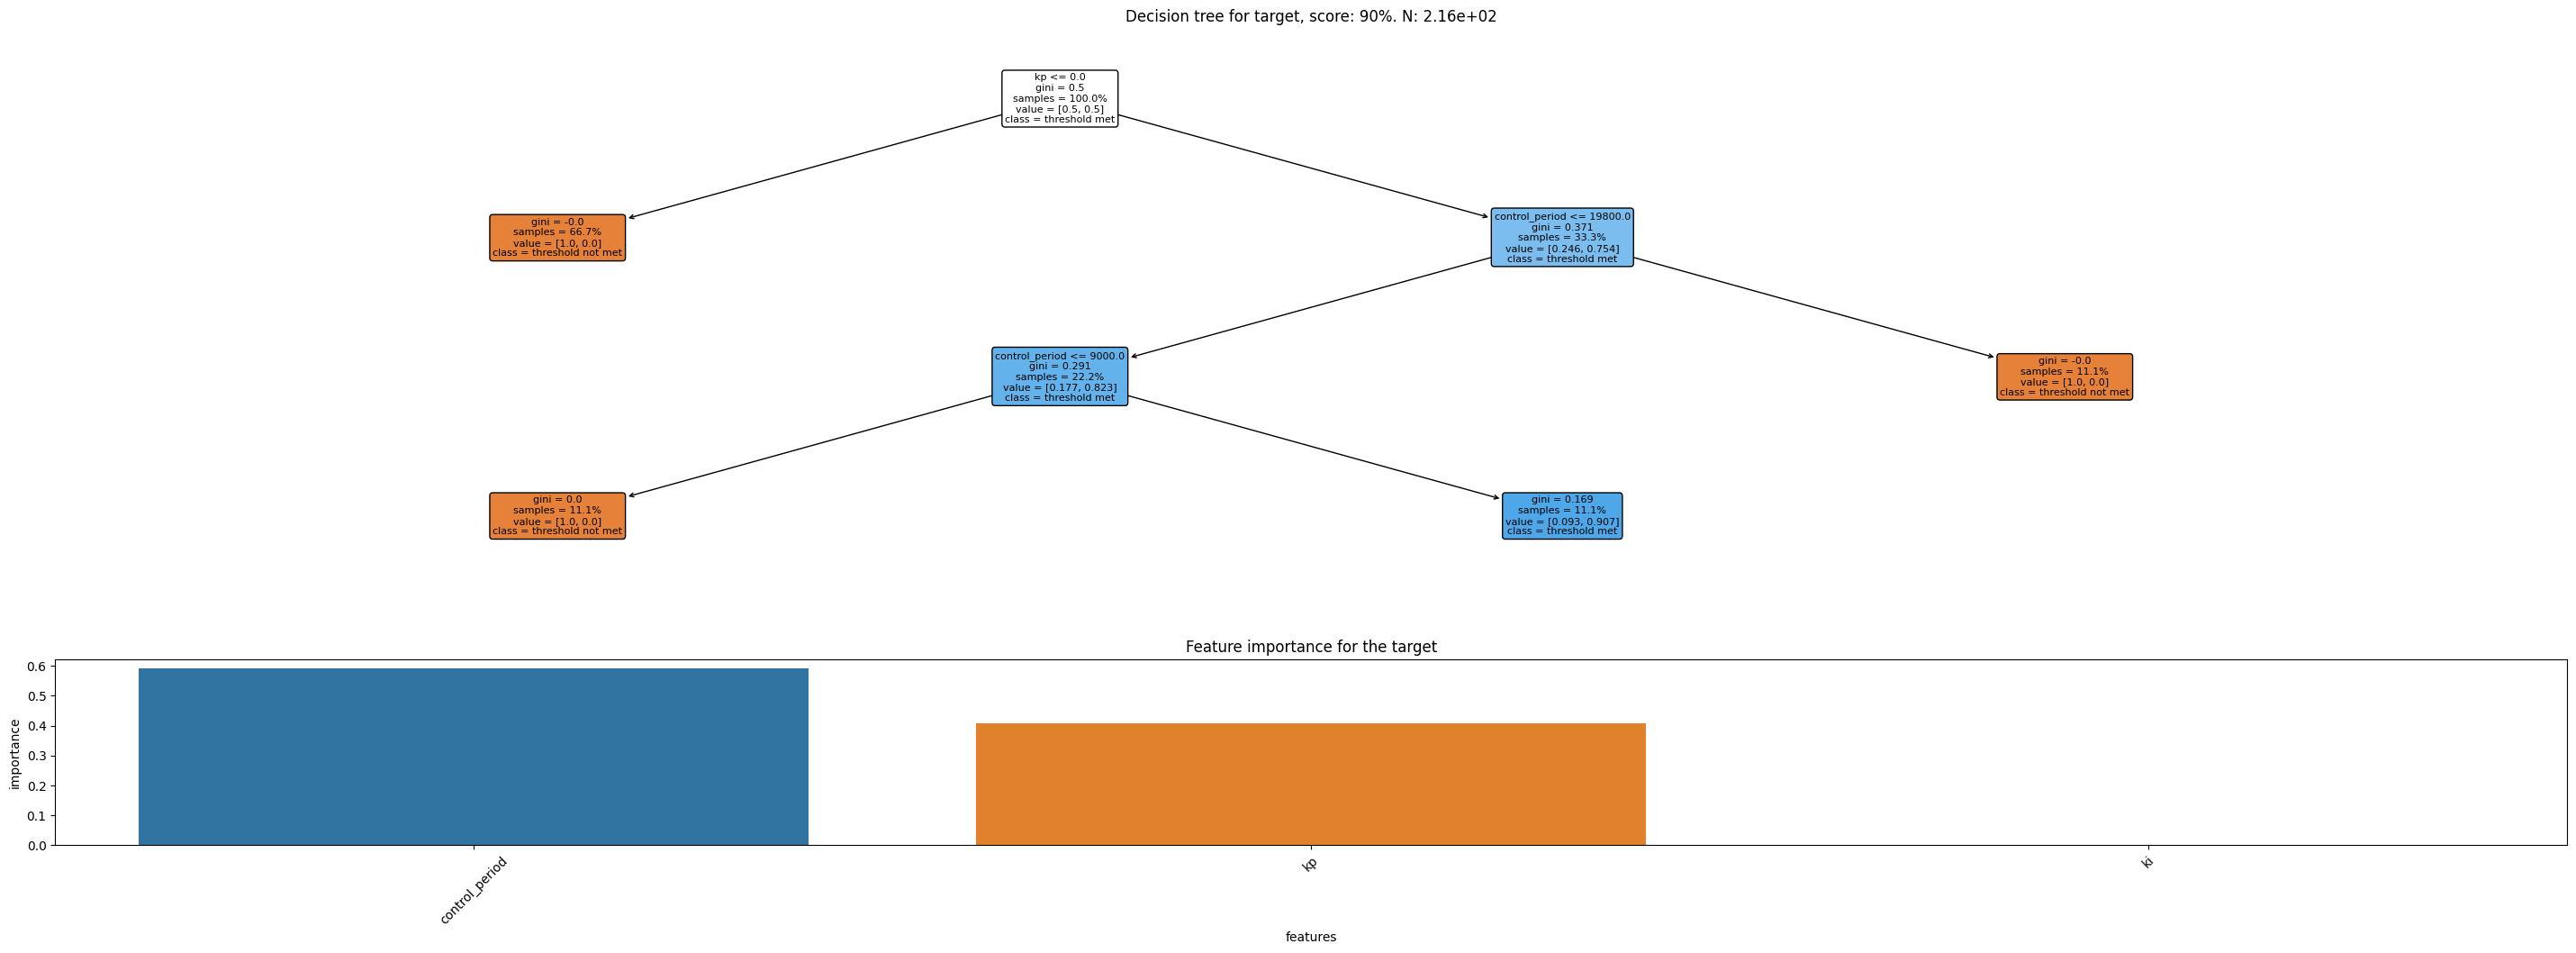

In [49]:
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['high_stability'], control_params)

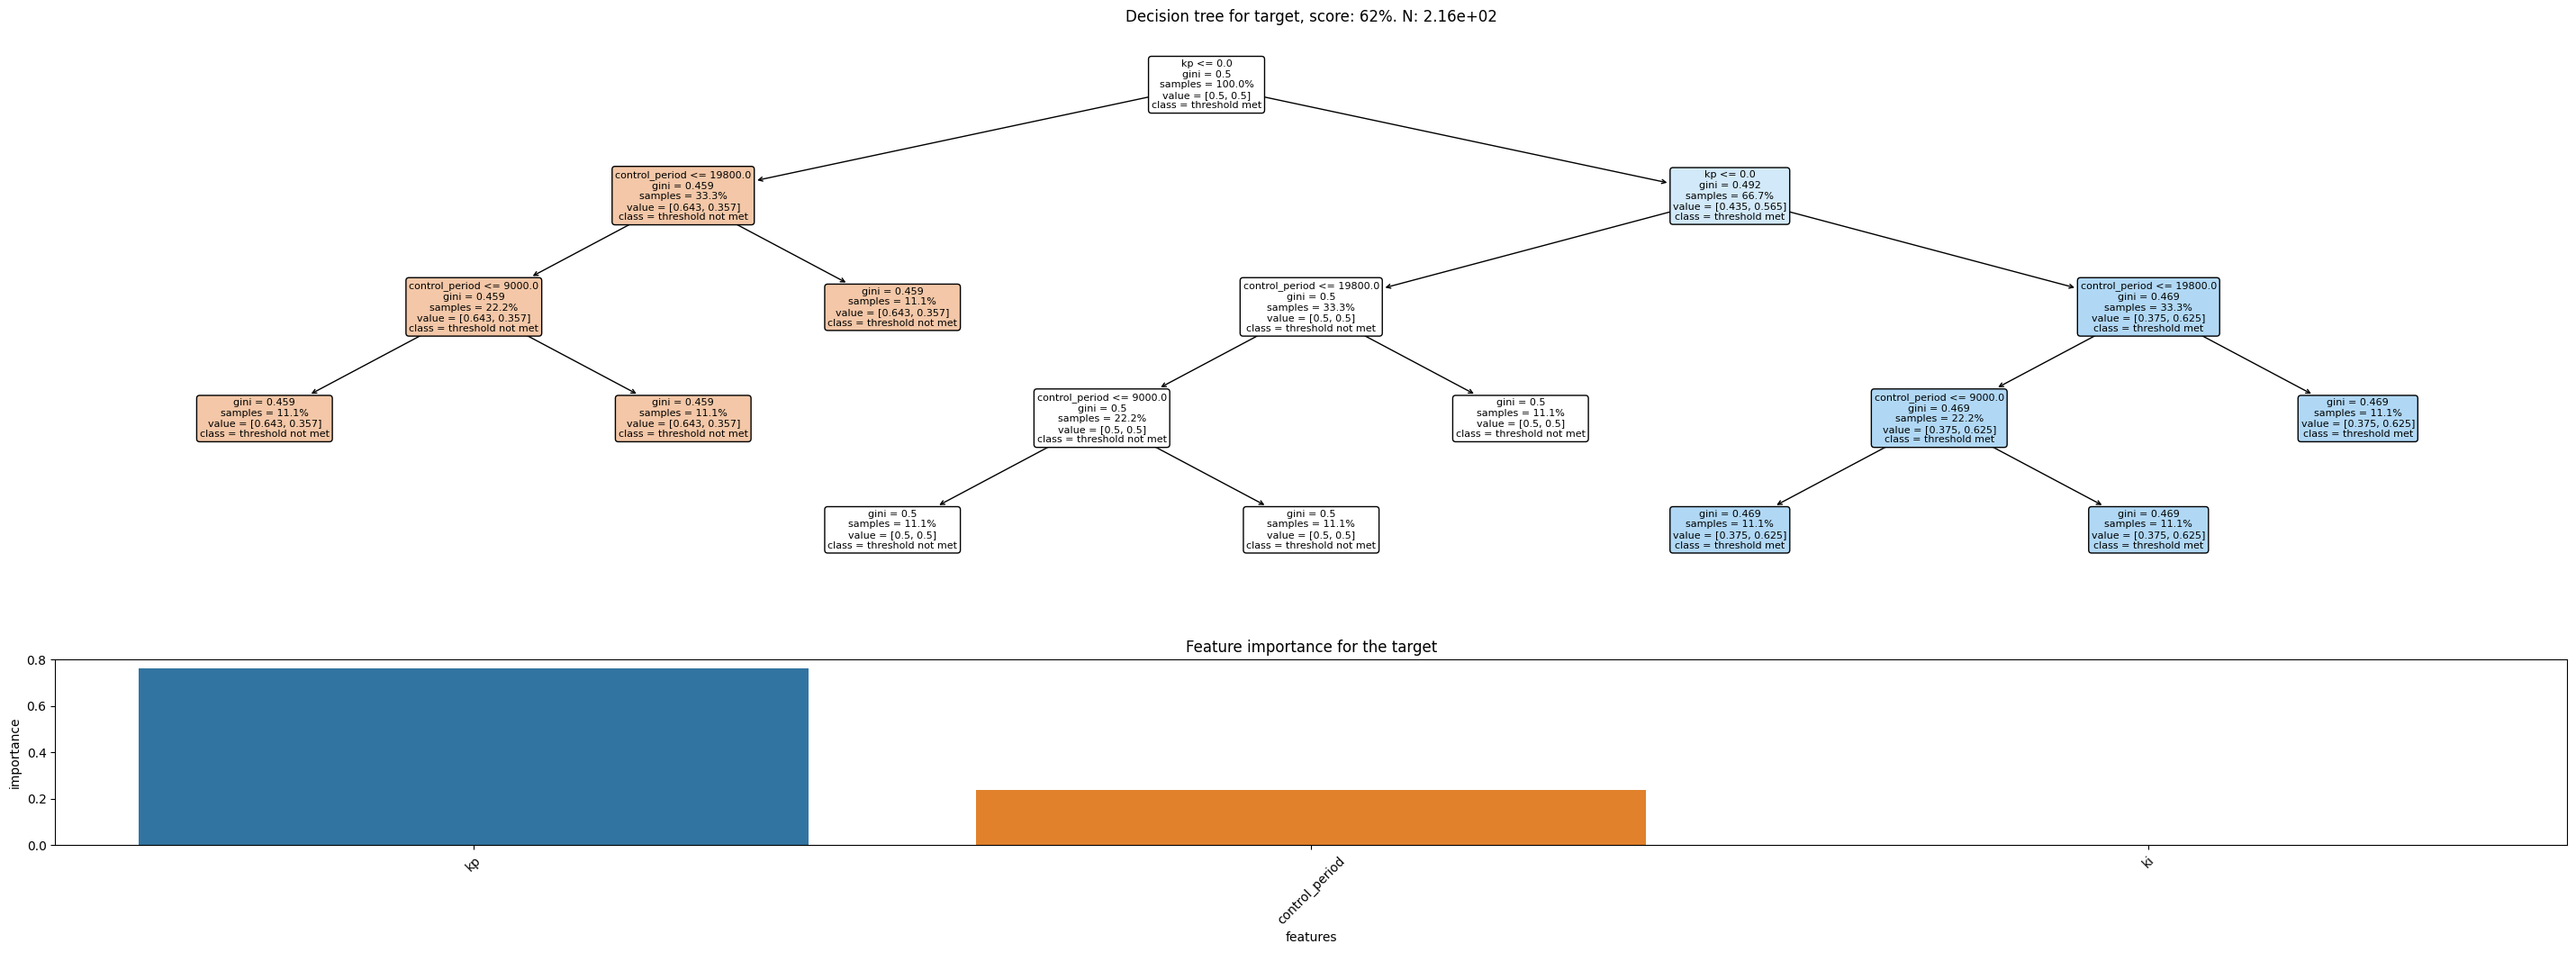

In [50]:
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['liquidity_threshold'], control_params)

#### Liquidity Demand Shock KPI Sensitivity - False

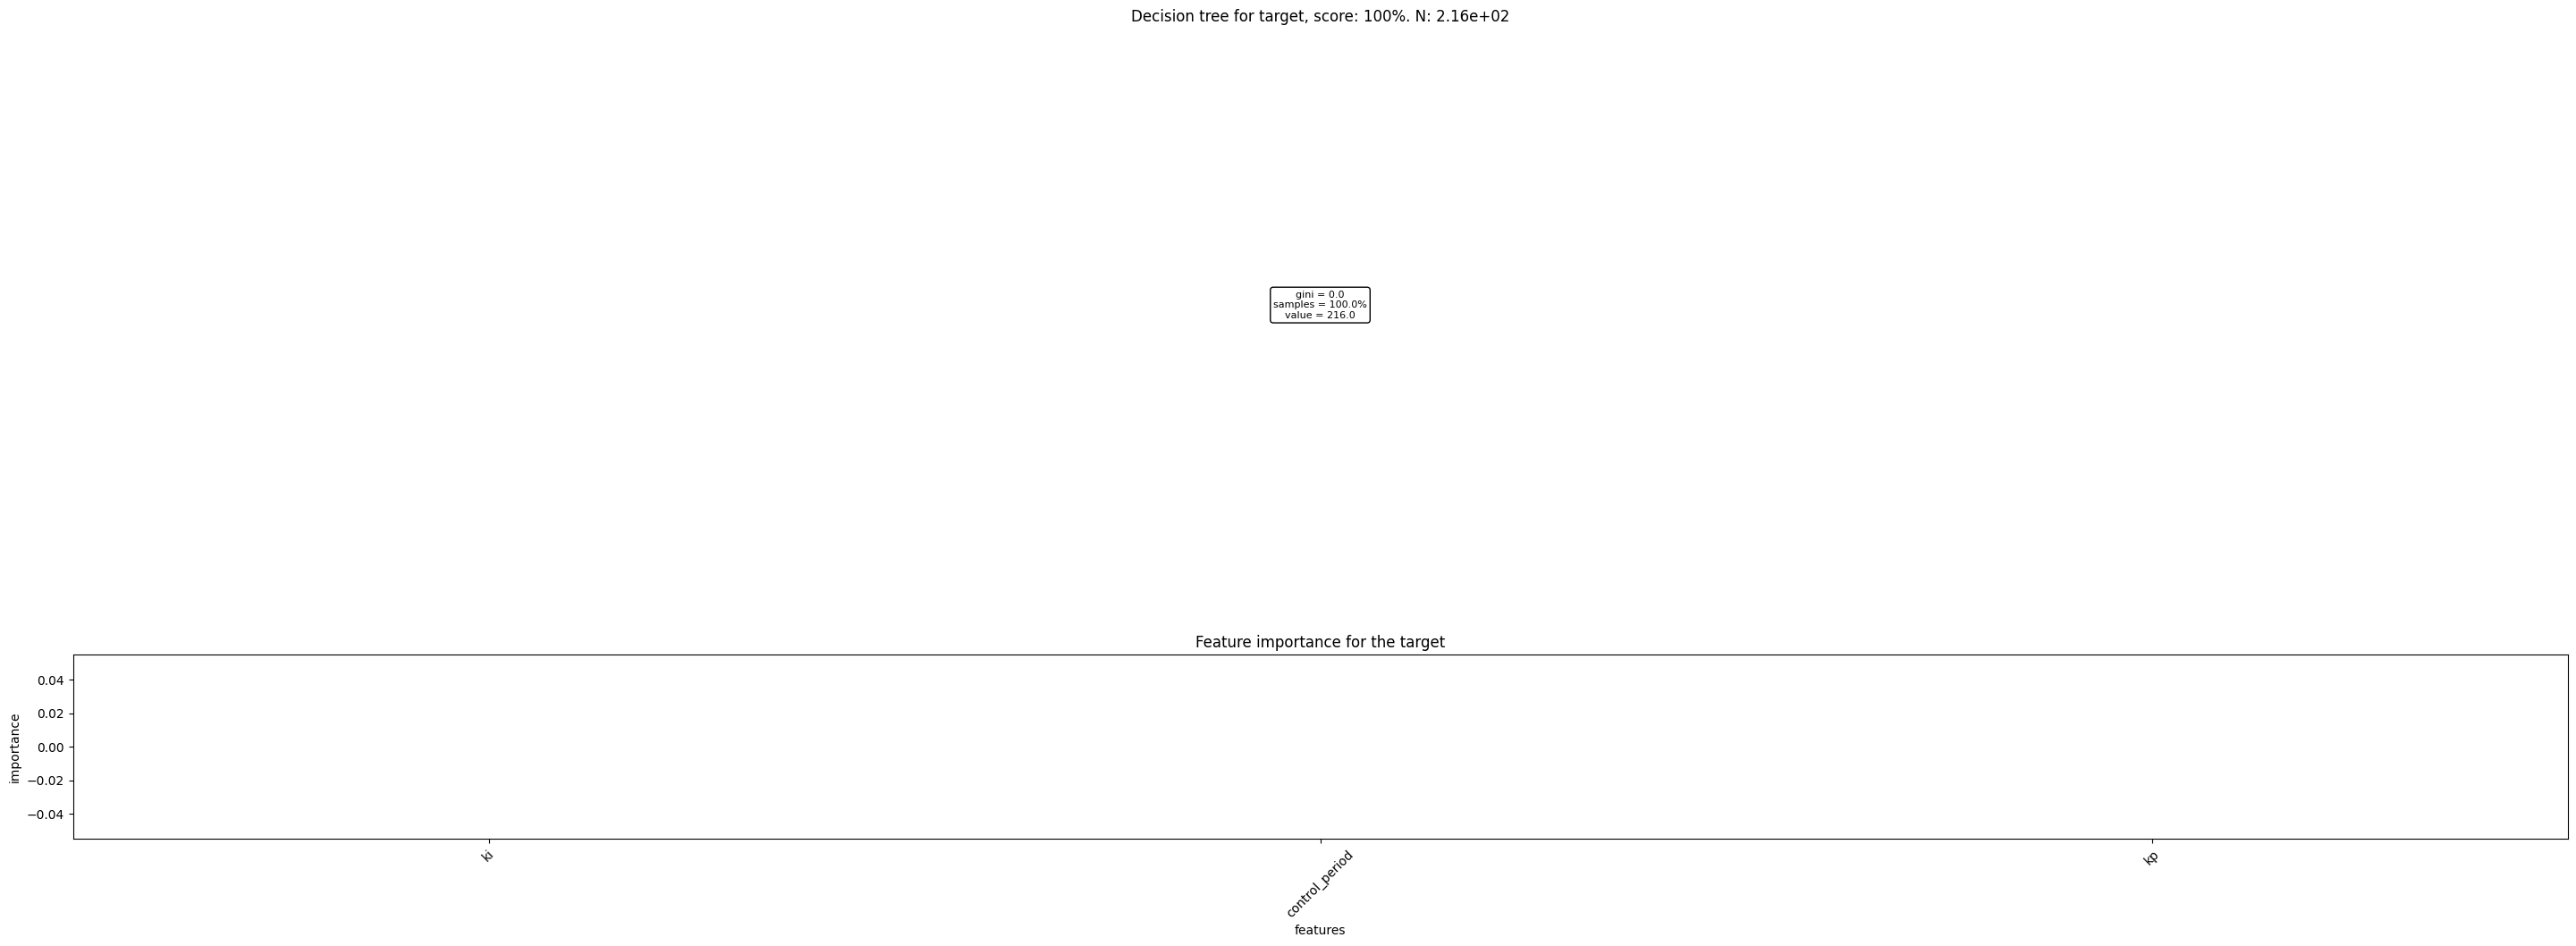

In [51]:
kpi_sensitivity_plot(liquidity_demand_shock_false, goals['low_volatility'], control_params)


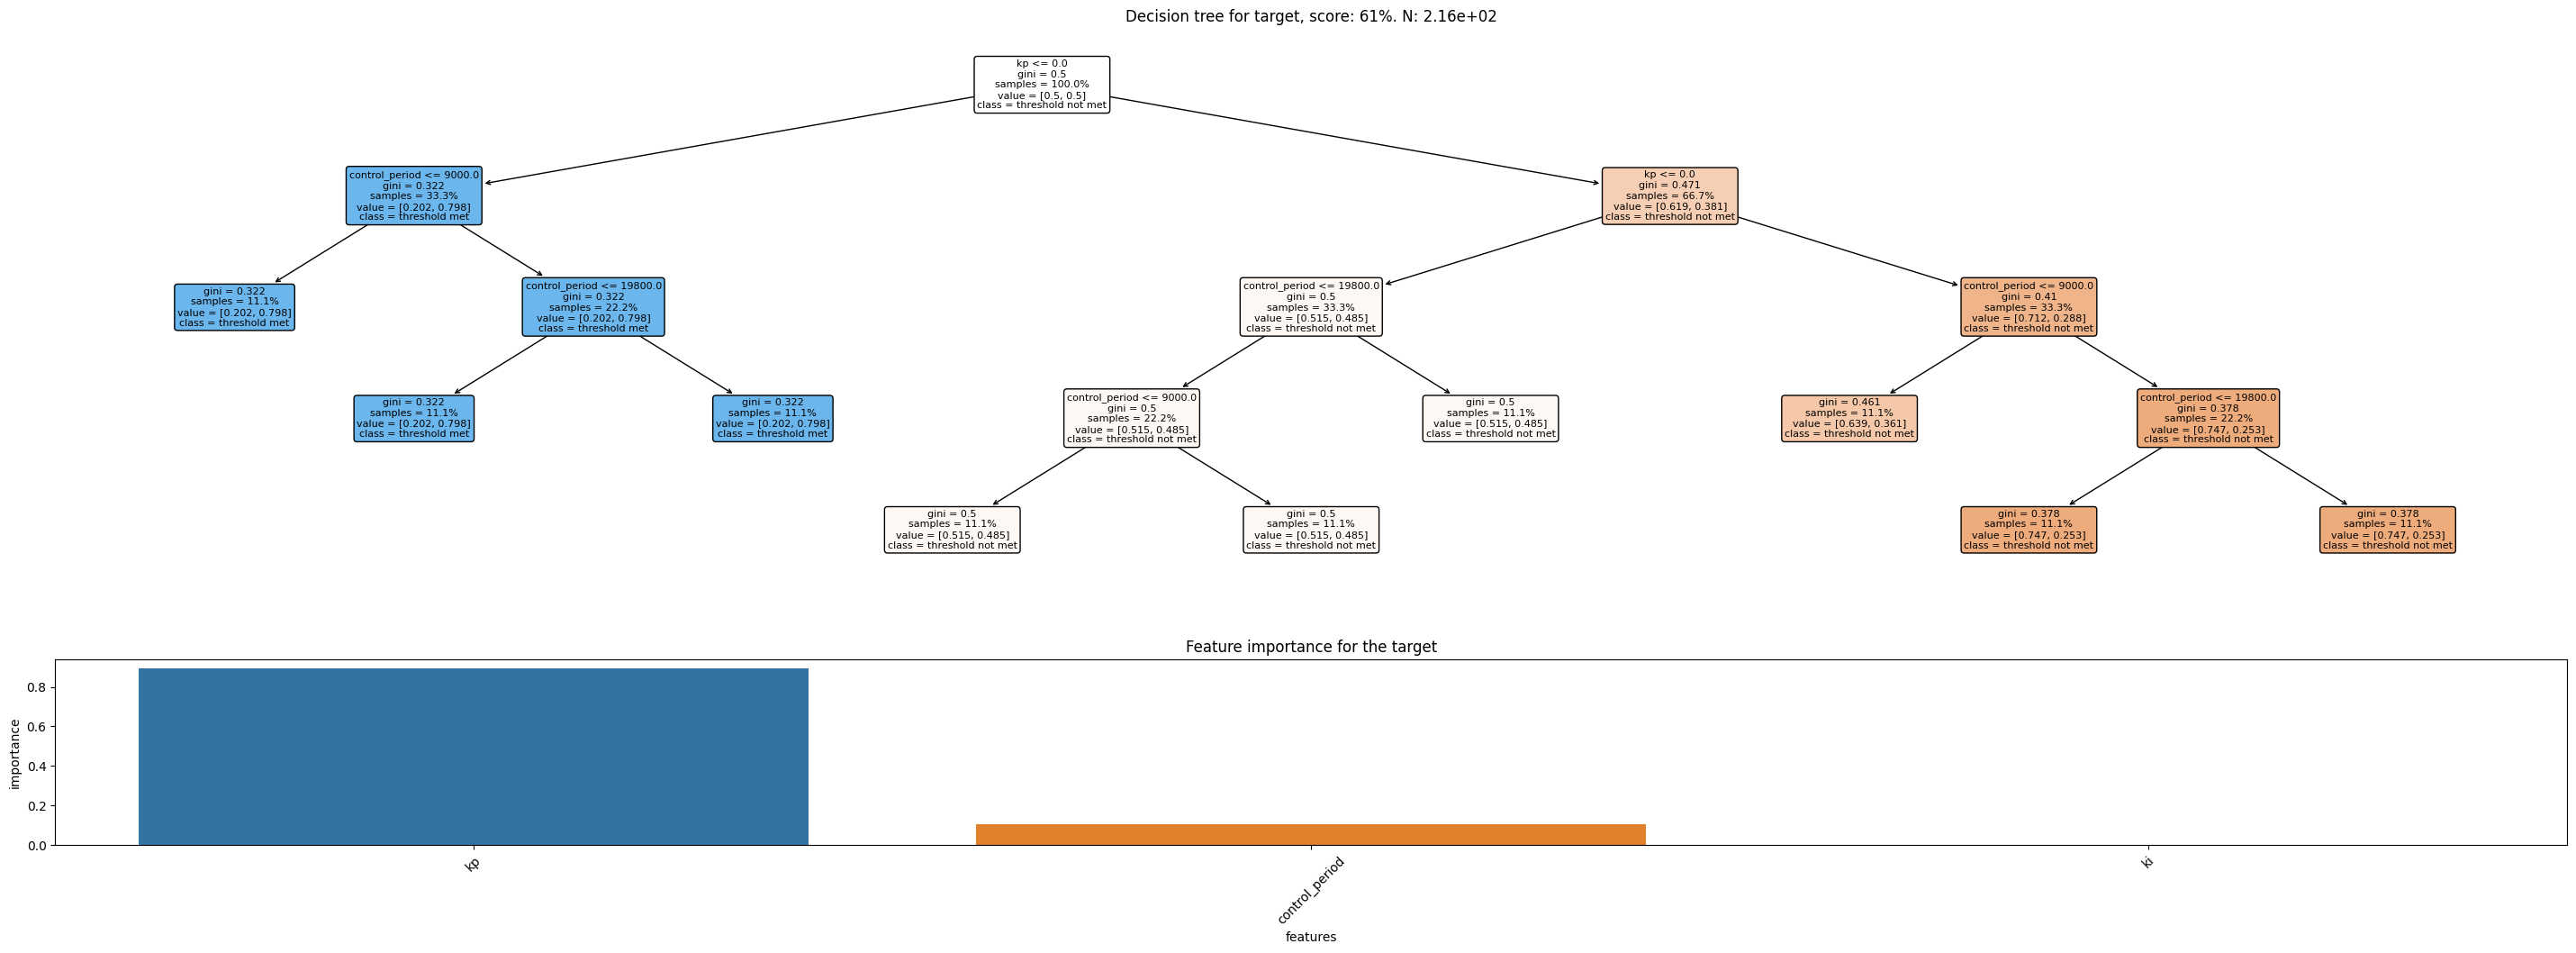

In [52]:
kpi_sensitivity_plot(liquidity_demand_shock_false, goals['high_stability'], control_params)

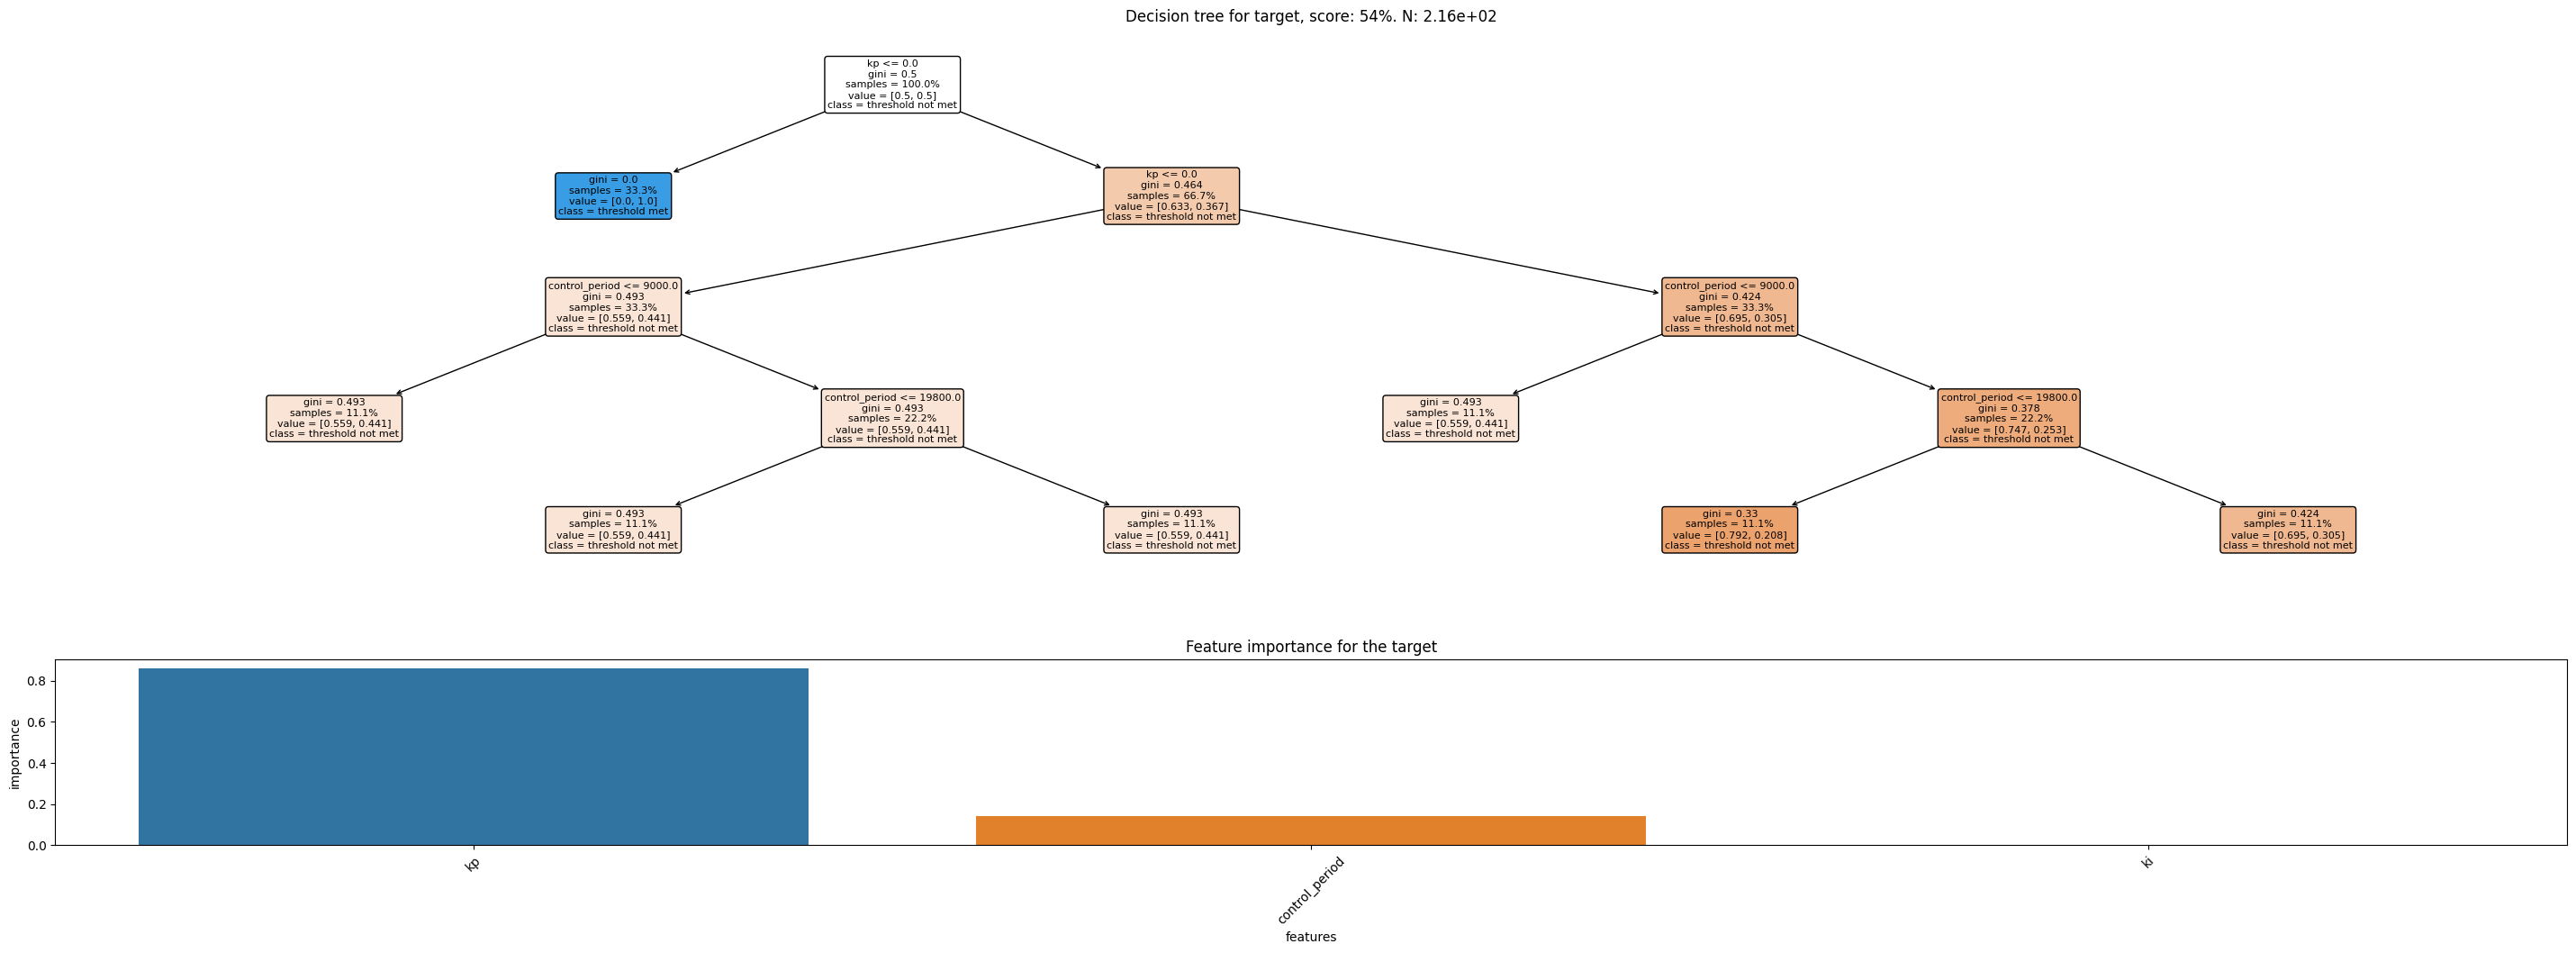

In [53]:
kpi_sensitivity_plot(liquidity_demand_shock_false, goals['liquidity_threshold'], control_params)

#### Liquidity Demand Shock KPI Sensitivity - True

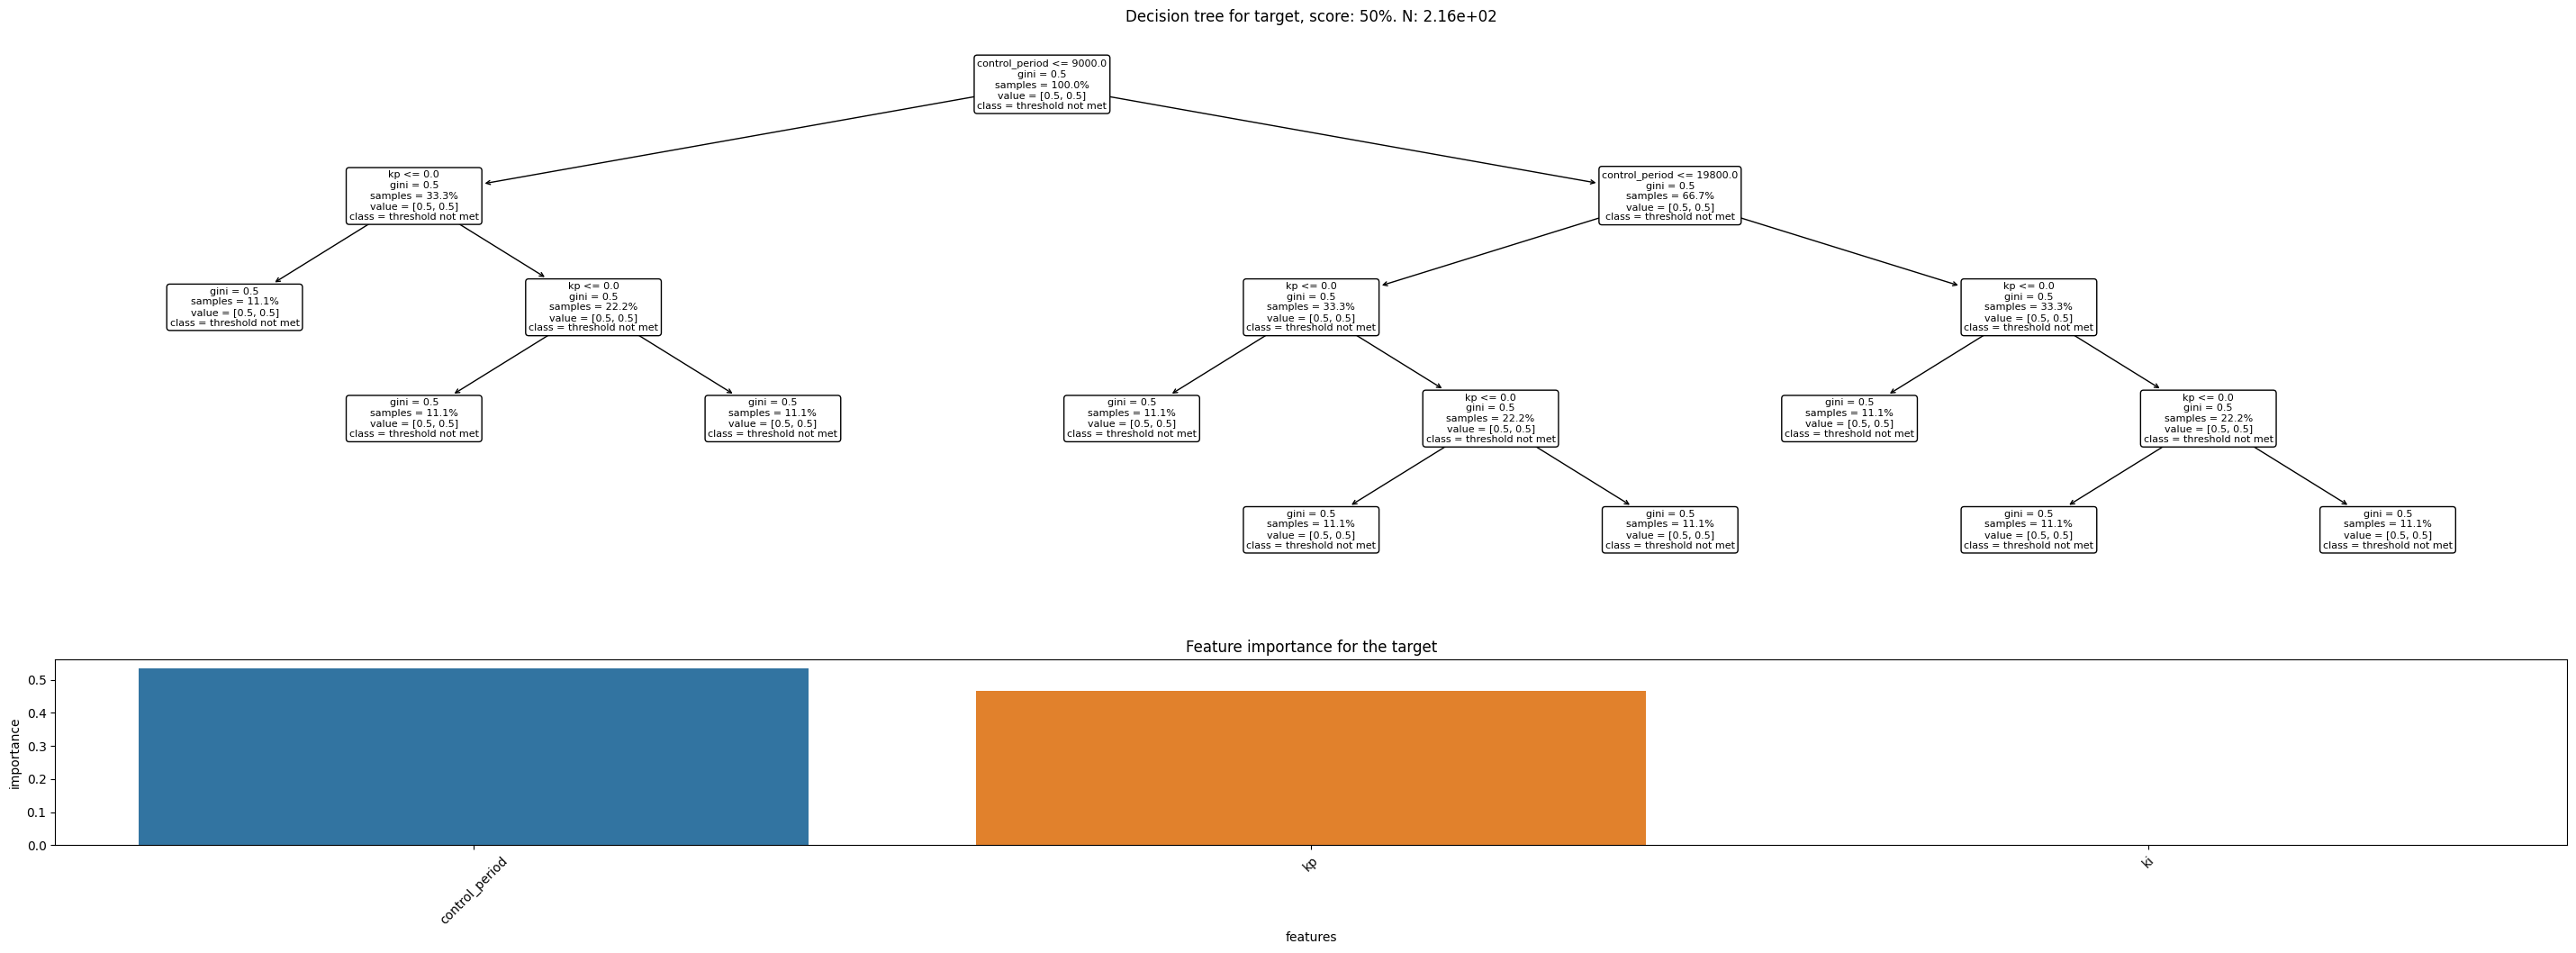

In [55]:
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['low_volatility'], control_params)


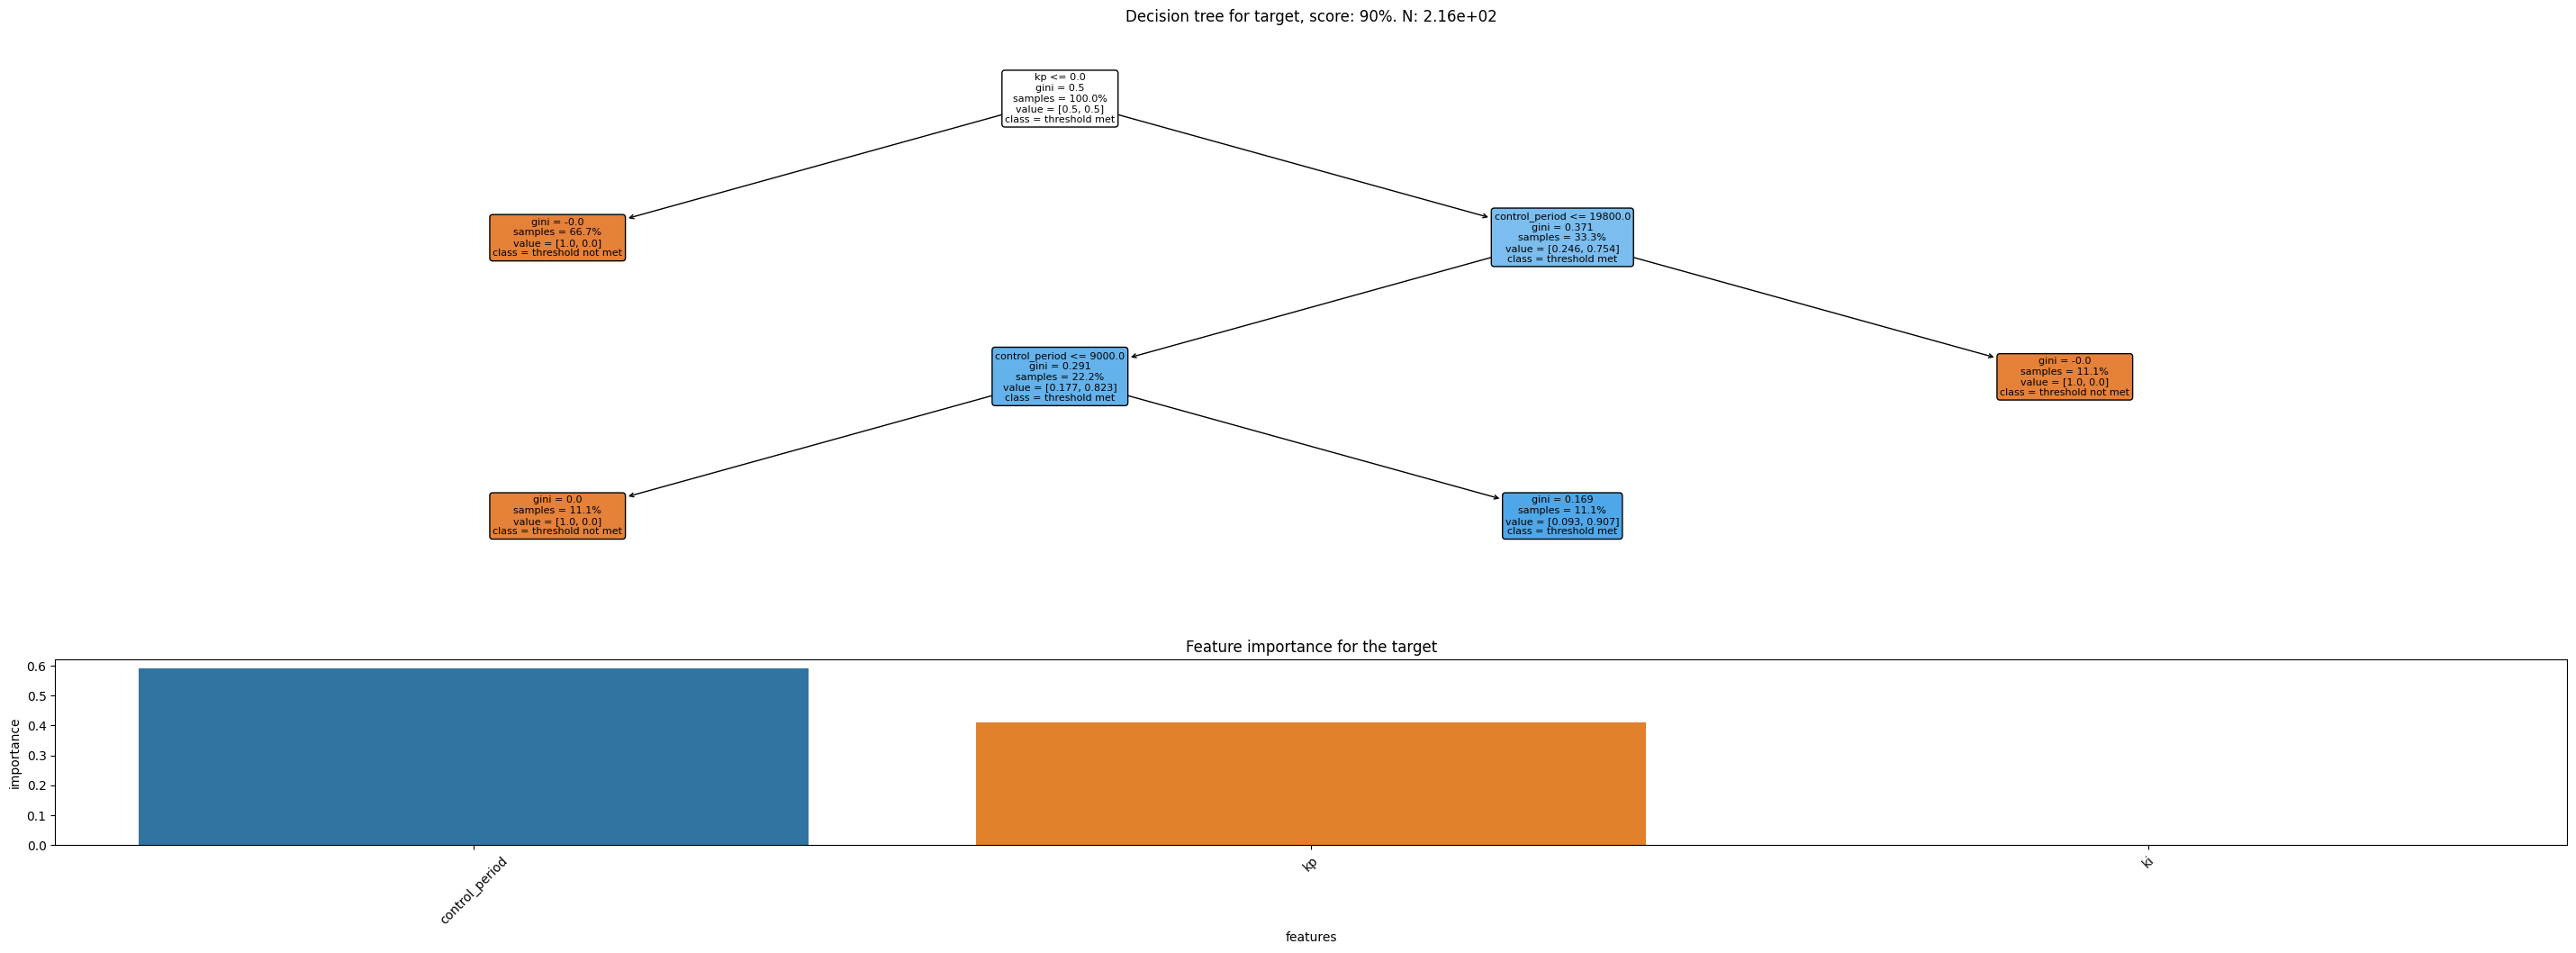

In [56]:
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['high_stability'], control_params)

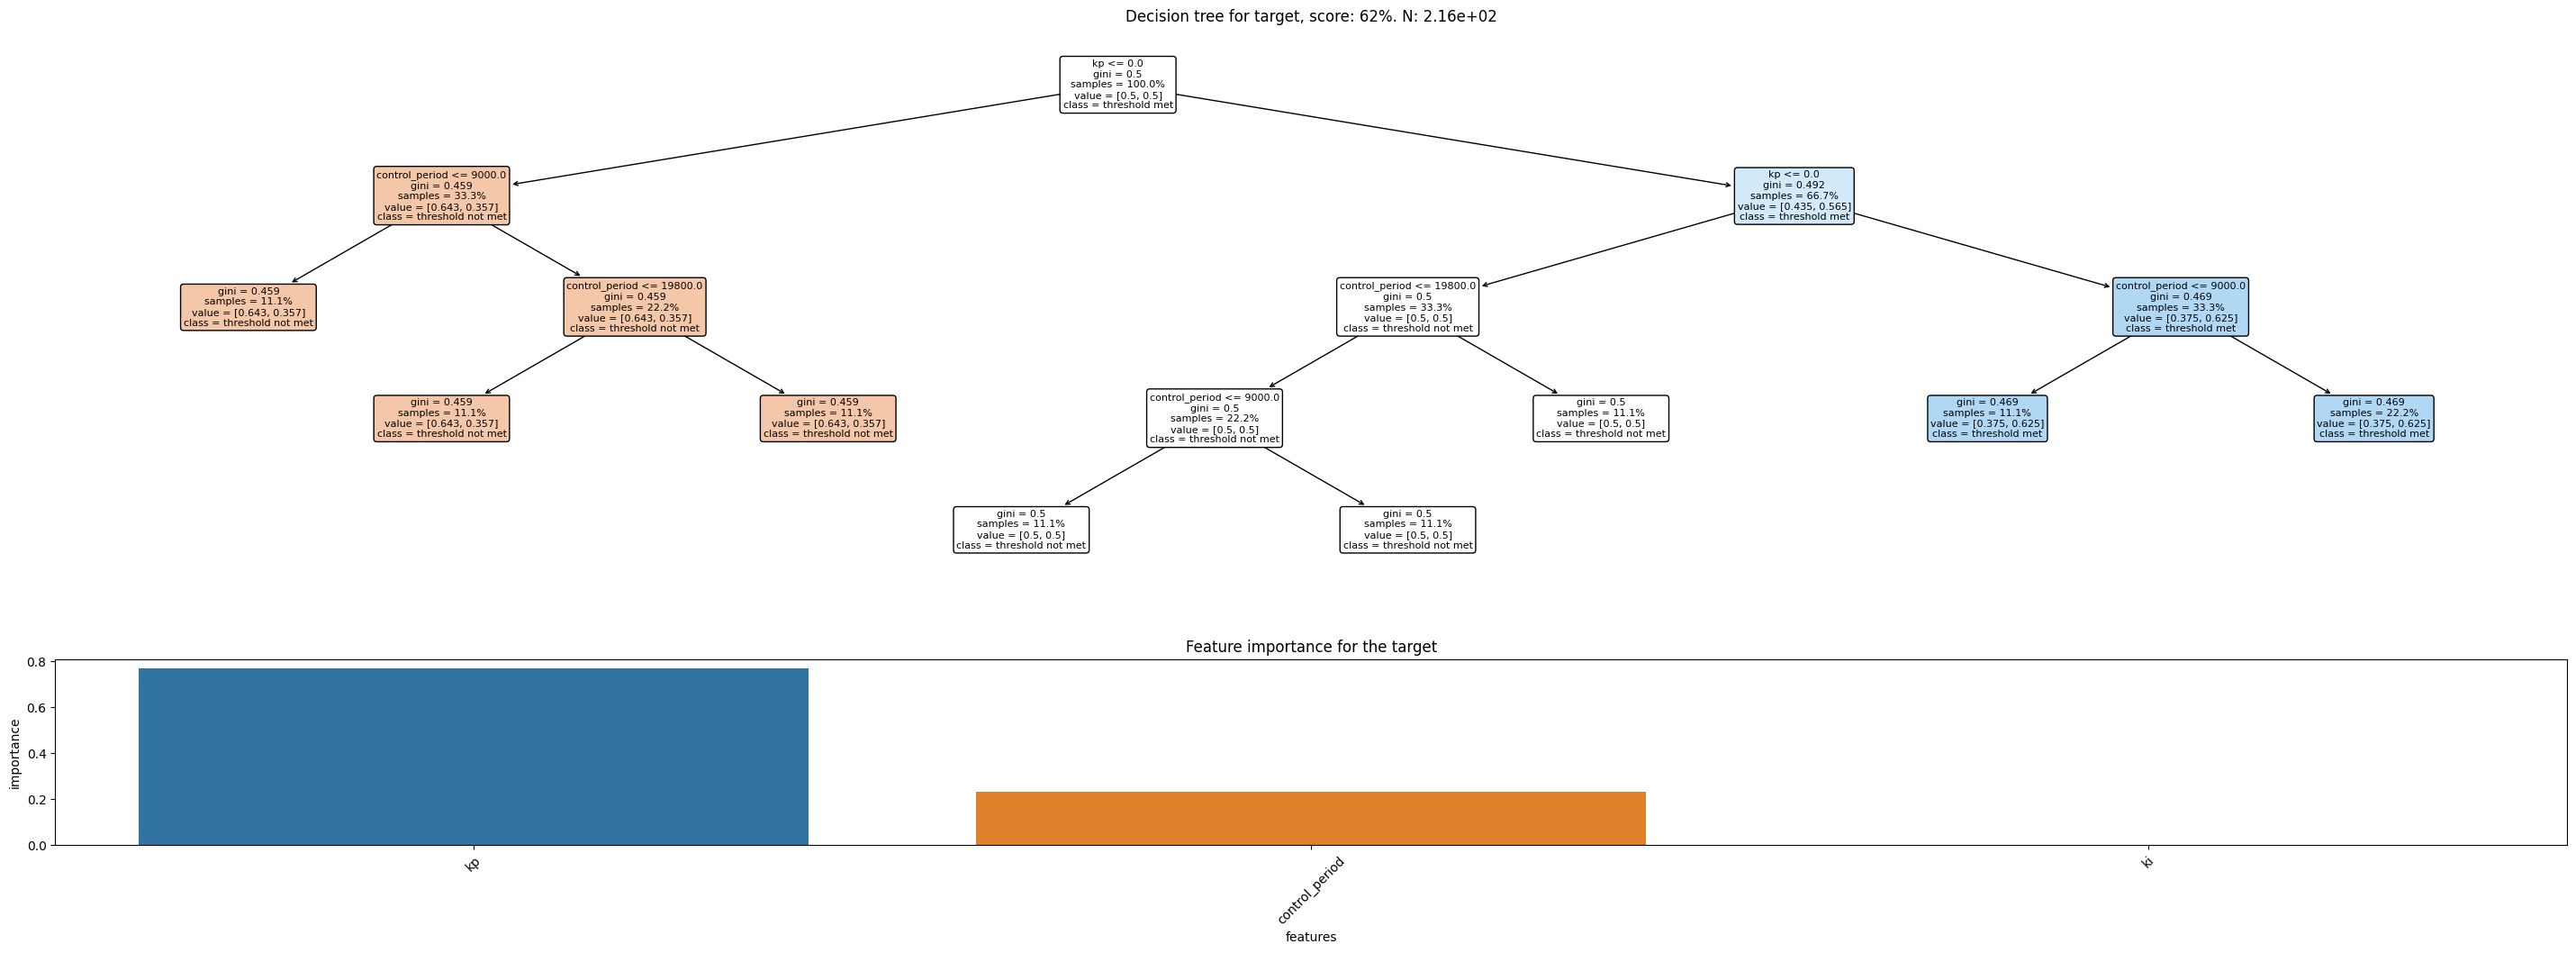

In [57]:
kpi_sensitivity_plot(liquidity_demand_shock_true, goals['liquidity_threshold'], control_params)

In [ ]:
from cadcad_machine_search.visualizations import plot_goal_ternary

# danlessa notes:
# 1. Make sure that the KPIs they are well behaved: eg: no NaNs
# 2. Be aware of division by zero on the goals
# 3. KPIs must transform a (N_s x N_t) array into a (N_s, 1) vector 
#   - N_s: number of 'experiments' (N_sweeps + N_mc)

kpis = {
    'volatility_simulation'        : lambda df: df['volatility_ratio_simulation'].max(),
    'volatility_window_mean'       : lambda df: df['volatility_ratio_window'].mean(),
    'market_price_max'             : lambda df: df['market_price'].max(),
    'market_price_min'             : lambda df: df['market_price'].min(),
    'redemption_price_max'         : lambda df: df['target_price_scaled'].max(),
    'redemption_price_min'         : lambda df: df['target_price_scaled'].min(),
    'rai_balance_uniswap_min'      : lambda df: df['RAI_balance'].min(),
    'cdp_collateral_balance_min'   : lambda df: df['eth_collateral'].min(),
}

from typing import Callable, Dict, List


def low_volatility_goal(metrics: Dict[str, List[float]]) -> float:
    utility = metrics['volatility_simulation']     
    #utility += metrics['price_change_percentile_mean']
    utility *= -1.0
    return utility
    

def high_stability_goal(metrics: Dict[str, List[float]]) -> float:
    # Note: I've changed the 1/x terms to -1 terms due to div by zero problems
    utility = metrics['market_price_max']
    utility -= metrics['market_price_min']
    utility -= metrics['redemption_price_max']
    utility -= metrics['redemption_price_min']
    utility -= metrics['rai_balance_uniswap_min']
    utility -= metrics['cdp_collateral_balance_min']
    utility *= -1.0
    return utility

def liquidity_goal(metrics: Dict[str, List[float]]) -> float:
    # danlessa note: price_change_percentile_mean seems to be ill-condionated
    # utility = -metrics['price_change_percentile_mean']
    utility = -metrics['market_price_min'] # Just for debugging
    return utility


goals = {
    'low_volatility': low_volatility_goal,
    'high_stability':  high_stability_goal,
    'liquidity': liquidity_goal,
    'combined': lambda goals: goals[0] + goals[1] + goals[2]
}


In [ ]:
# 1. Make sure that the KPIs they are well behaved: eg: no NaNs
# 2. Be aware of division by zero on the goals
# 3. KPIs must transform a (N_s x N_t) array into a (N_s, 1) vector 
#   - N_s: number of 'experiments' (N_sweeps + N_mc)

In [28]:
true = df_sensitivity.query('controller_enabled == True')
plot_goal_ternary(true, kpis, goals, control_params)

In [27]:
false = df_sensitivity.query('controller_enabled == False')
plot_goal_ternary(false, kpis, goals, control_params)

/home/aclarkdata/anaconda3/lib/python3.8/site-packages/cadcad_machine_search/visualizations/goal_impact.py:48: RuntimeWarning:

invalid value encountered in true_divide

/home/aclarkdata/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning:

All-NaN slice encountered

/home/aclarkdata/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning:

All-NaN slice encountered



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Conclusion